# Ejercicio de Feedback Regresiones y Random Forest

## Regresión lineal

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import linear_reset, het_breuschpagan, het_white
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('precio_casas.csv')

In [ ]:
df.head(10)

,size,location_index,num_rooms,price
0,132.0,7.737263,3.0,220.0
1,177.0,4.782480,3.0,212.0
2,65.0,6.799200,3.0,204.0
3,124.0,3.161152,2.0,189.0
4,152.0,1.961260,4.0,212.0
5,70.0,4.416613,3.0,199.0
6,22.0,5.137126,3.0,189.0
7,141.0,2.558313,2.0,187.0
8,141.0,8.793586,3.0,220.0
9,89.0,5.621815,3.0,194.0


In [ ]:
#Tamaño de mi dataset
df.shape

(150, 4)

### Apartado 1.1



In [ ]:
#Calculo la media y varianza de Size
media_size=df['size'].mean()
varianza_size=df['size'].var()
std_size=df['size'].std()
print(media_size)
print(varianza_size)

97.28
1906.6324832214773


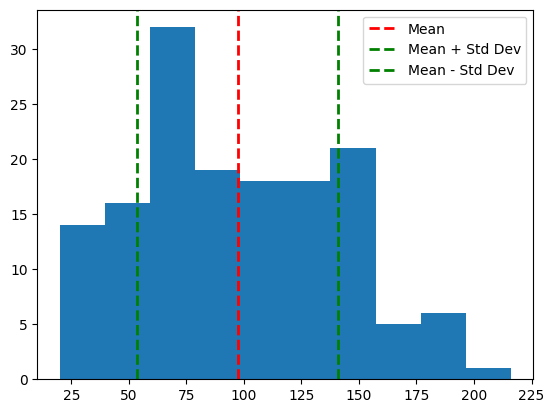

In [ ]:
plt.hist(df['size'])
plt.axvline(media_size, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()

plt.axvline(media_size + std_size, color='g', linestyle='dashed', linewidth=2, label='Mean + Std Dev')
plt.axvline(media_size - std_size, color='g', linestyle='dashed', linewidth=2, label='Mean - Std Dev')
plt.legend()
plt.show()

En esta representación se puede apreciar una forma de campana, es decir que la mayoría de casas se centran entorno a los 100m2, la desviación estandar nos ayuda a entender que la mayor parte de las casas se centran entre los 60m2 y 140m2, se puede observar que hay algunos outliers que se encuentran fuera de el conjunto mayoritario de datos con casas de hasta aproximadamente 215m2



### Apartado 1.2

In [ ]:
#Calculo los coeficientes de la regresión con Size y Price
list(zip(df['size'], df['price']))
num=sum([(x-media_size)*(y-df['price'].mean()) for (x,y) in list(zip(df['size'], df['price']))])
den=sum([(x-media_size)**2 for x in df['size']])
b1=num/den
b0=df['price'].mean()-(b1*media_size)
Price_pred=b0+b1*df['size']


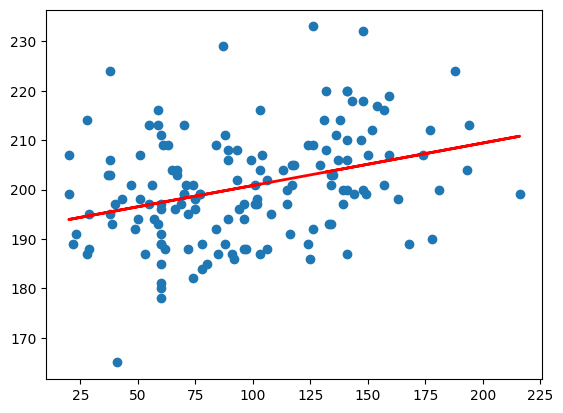

In [ ]:

plt.scatter(df['size'], df['price'], s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
plt.plot(df['size'],Price_pred , color='red', linewidth=2, label='linea regresion')

In [ ]:
r2=r2_score(df['price'], Price_pred)
print(r2)

0.11373779717535148


In [ ]:
#Calculo los coeficientes de la regresión con Location_Index y Price
list(zip(df['location_index'], df['price']))
num=sum([(x-df['location_index'].mean())*(y-df['price'].mean()) for (x,y) in list(zip(df['location_index'], df['price']))])
den=sum([(x-df['location_index'].mean())**2 for x in df['location_index']])
b1=num/den
b0=df['price'].mean()-(b1*df['location_index'].mean())
Price_pred2=b0+b1*df['location_index']


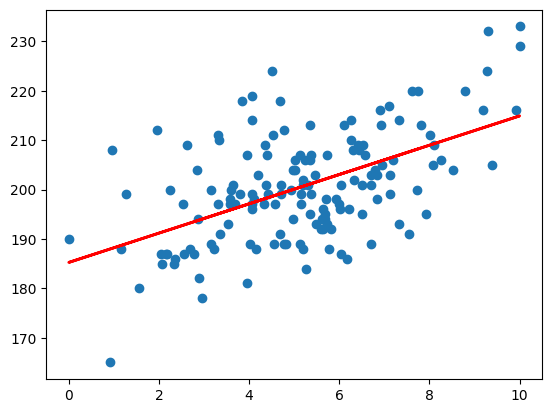

In [ ]:
plt.scatter(df['location_index'], df['price'], s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
plt.plot(df['location_index'], Price_pred2, color='red', linewidth=2, label='linea regresion')

In [ ]:
r2=r2_score(df['price'], Price_pred2)
print(r2)

0.2881946116269446


Ambas son buenas variables predictoras ya que la nube de datos se puede representar linealmente en ambos casos, sin embargo podemos observar que en el caso de considerar location index como variable predictora los datos quedan menos distribuidos y más cerca de nuestro ajuste lineal.

### Apartado 1.3

In [ ]:
#Divido mis datos en entrenamiento y test reconociendo la variable predictora y la que quiero predecir
X=df['location_index']
Y=df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=135)

In [ ]:
#Columna de unos para multiplicar el término independiente
X_train_unos = sm.add_constant(X_train)

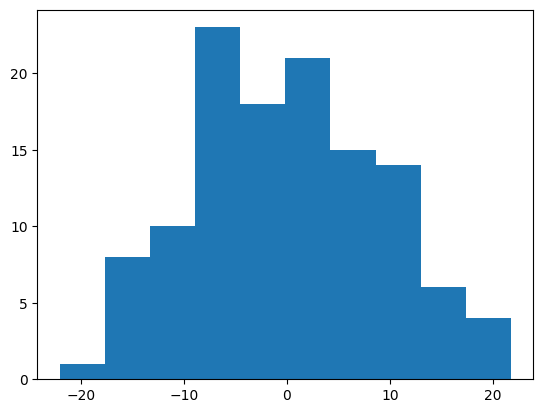

In [ ]:
#Analizo los residuos y hago test de hipótesis ramsey para ver si el modelo es viable
model = sm.OLS(Y_train, X_train_unos).fit()
residuos = model.resid
plt.hist(residuos)
plt.show()


Los residuos siguen una distribución normal, hacemos ramsey para ver si es compatible

In [ ]:
summarires=model.summary()
print(summarires)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     52.61
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           4.63e-11
Time:                        18:37:35   Log-Likelihood:                -436.86
No. Observations:                 120   AIC:                             877.7
Df Residuals:                     118   BIC:                             883.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            184.1266      2.420     76.

In [ ]:
#Test Ramsey
p_valor_reset = linear_reset(model).pvalue
print(f"P-valor del test RESET de Ramsey: {p_valor_reset}")

P-valor del test RESET de Ramsey: 0.005220037289179166


Mi nivel si significancia es 0,05 es decir en el 95% de las veces voy a aceptar mi hipótesis nula, en este caso al ser el pv menos de 0,05 no la aceptamos.

In [ ]:
#Test Breusch-Pagan
_, pv1_bp, _, pv2_bp = het_breuschpagan(residuos, X_train_unos)
print(f"P-valor del 1er conjunto de Breusch-Pagan:{pv1_bp}")
print(f"P-valor del segundo conjunto de Breusch-Pagan: {pv2_bp}")

P-valor del 1er conjunto de Breusch-Pagan:0.5915932918470932
P-valor del segundo conjunto de Breusch-Pagan: 0.5952581862688073


In [ ]:
#Test Shapiro Wills
_, p_valor_shapiro = shapiro(residuos)
print(f"P-valor de Shapiro-Wilks: {p_valor_shapiro}")

P-valor de Shapiro-Wilks: 0.47038136084651727


Es muy posible que nuestros indicadores de calidad del modelo presenten estos valores debido a que nos falte información. Sería conveniente añadir más variables para hacer una mejor predicción

### Apartado 1.4

In [ ]:
#Divido mis datos en entrenamiento y test reconociendo la variables predictoras  y la que quiero predecir
X=df.drop(columns='price')
Y=df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=135, shuffle=True)

In [ ]:
#Columna de unos para multiplicar el término independiente
X_train_unos = sm.add_constant(X_train)

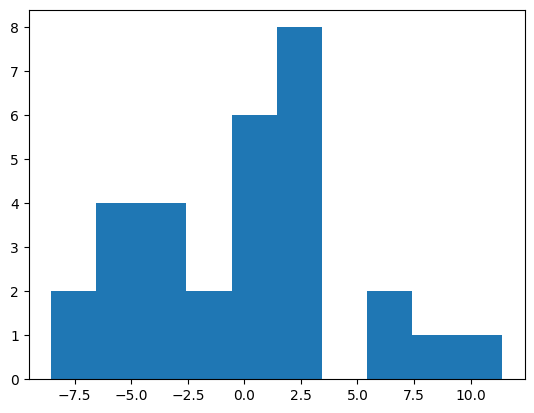

In [ ]:
#Analizo los residuos y hago test de hipótesis ramsey para ver si el modelo es viable
model2 = sm.OLS(Y_train, X_train_unos).fit()
residuos = model2.resid
plt.hist(residuos)
plt.show()

In [ ]:
summarires=model2.summary()
print(summarires)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     90.09
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           7.34e-14
Time:                        11:32:58   Log-Likelihood:                -89.014
No. Observations:                  30   AIC:                             186.0
Df Residuals:                      26   BIC:                             191.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            128.1638      5.206     24.

In [ ]:
#Test Ramsey
p_valor_reset = linear_reset(model2).pvalue
print(f"P-valor del test RESET de Ramsey: {p_valor_reset}")



P-valor del test RESET de Ramsey: 0.40433426793177196


In [ ]:
#Test Breusch-Pagan
_, pv1_bp, _, pv2_bp = het_breuschpagan(residuos, X_train_unos)
print(f"P-valor del 1er conjunto de Breusch-Pagan:{pv1_bp}")
print(f"P-valor del segundo conjunto de Breusch-Pagan: {pv2_bp}")

P-valor del 1er conjunto de Breusch-Pagan:0.5411459654340149
P-valor del segundo conjunto de Breusch-Pagan: 0.5779744315990898


In [ ]:
#Test Shapiro Wills
_, p_valor_shapiro = shapiro(residuos)
print(f"P-valor de Shapiro-Wilks: {p_valor_shapiro}")

P-valor de Shapiro-Wilks: 0.5110181305390908


Al analizar los supuentos y haber escogido un nivel de significancia de un 0,05 podemos ver que la linealidad se cumple, la homocedasticidad tambien es buena y a través de la representación y nuestro test de shappiro vemos que la distribución de los residuos es normal.

En este caso nuestro r^2 es de 0,90 lo cual indica que hay un alto nivel de correlación etre las variables predictioras elegidas y la predecida, es entonces un buen resultado.

## Regresión Logística

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import roc_curve, auc

In [ ]:
df=pd.read_csv('deteccion_cancer.csv')

In [ ]:
df.head(10)

,radius,texture,concavity,Diagnosis
0,17.99,10.38,0.30010,1
1,20.57,17.77,0.08690,1
2,19.69,21.25,0.19740,1
3,11.42,20.38,0.24140,1
4,20.29,14.34,0.19800,1
5,12.45,15.70,0.15780,1
6,18.25,19.98,0.11270,1
7,13.71,20.83,0.09366,1
8,13.00,21.82,0.18590,1
9,12.46,24.04,0.22730,1


### Apartado 2.1

In [ ]:
df.shape

(569, 4)

In [ ]:
count_ones = (df['Diagnosis'] == 1).sum()
count_zeros = (df['Diagnosis'] == 0).sum()
print(count_ones)
print(count_zeros)

212
357


In [ ]:
#Calculo la probabilidad de que un paciente aleatorio tenga nevus maligno
pMalig=count_ones/(count_ones+count_zeros)
print(pMalig)
pBenign=count_zeros/(count_ones+count_zeros)
print(pBenign)

0.37258347978910367
0.6274165202108963


In [ ]:
#Calculo el odd y log odd asociados al suceso
oddMalig=pMalig/(1-pMalig)
print(oddMalig)
logoddMalig=np.log(oddMalig)
print(logoddMalig)

0.5938375350140055
-0.5211495071076269


### Apartado 2.2

In [ ]:
#Divido mis datos en entrenamiento y test reconociendo la variables predictoras  y la que quiero predecir
X=df[['radius']]
Y=df['Diagnosis']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=135, shuffle=True)

In [ ]:
#Describo el modelo y lo entreno
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [ ]:
#Defino mi vector de predicciones de probabiblidad
Y_pred_prob = model.predict_proba(X_test)[:, 1]

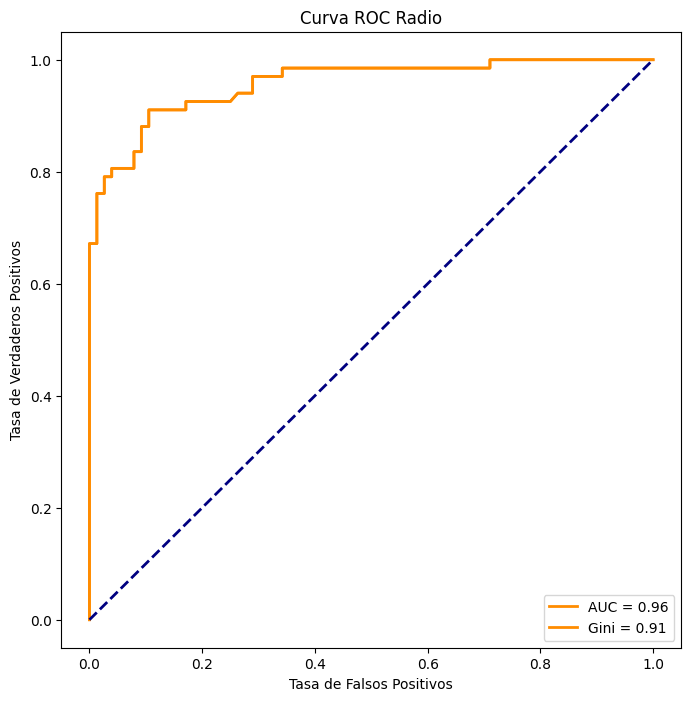

In [ ]:
#Describo mi curva rocRadius
fpr, tpr, thresholds=roc_curve(Y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)
gini = 2 * roc_auc - 1

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Gini = {gini:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Radio')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Calculo AUC y Gini
roc_auc = auc(fpr, tpr)
gini = 2 * roc_auc - 1
print(roc_auc)
print(gini)

0.9570895522388059
0.9141791044776117


In [ ]:
#Divido mis datos en entrenamiento y test reconociendo la variables predictoras  y la que quiero predecir
X2=df[['texture']]
Y=df['Diagnosis']
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.25, random_state=135, shuffle=True)

In [ ]:
#Describo el modelo y lo entreno
model2 = LogisticRegression()
model.fit(X2_train, Y_train)

LogisticRegression()

In [ ]:
#Defino mi vector de predicciones de probabiblidad
Y2_pred_prob = model.predict_proba(X2_test)[:, 1]

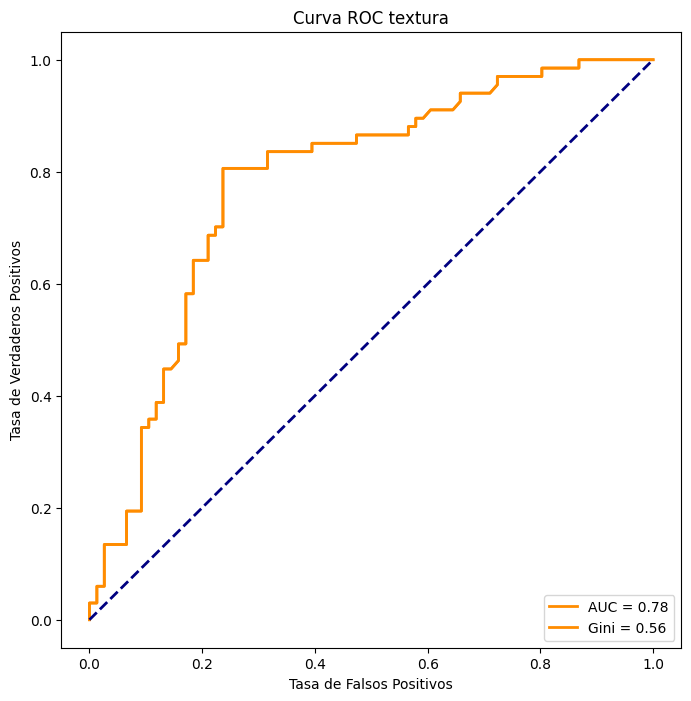

In [ ]:
#Describo mi curva rocTexture y calculo el gini2
fpr2, tpr2, thresholds2=roc_curve(Y_test, Y2_pred_prob)
roc_auc2 = auc(fpr2, tpr2)
gini2 = 2 * roc_auc2 - 1

plt.figure(figsize=(8, 8))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f'AUC = {roc_auc2:.2f}')
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f'Gini = {gini2:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC textura')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Calculo AUC y Gini
roc_auc2 = auc(fpr2, tpr2)
gini2 = 2 * roc_auc2 - 1
print(roc_auc2)
print(gini2)

0.7818146111547526
0.5636292223095052


In [ ]:
#Divido mis datos en entrenamiento y test reconociendo la variables predictoras  y la que quiero predecir
X3=df[['concavity']]
Y=df['Diagnosis']
X3_train, X3_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.25, random_state=135, shuffle=True)

In [ ]:
#Describo el modelo y lo entreno
model3 = LogisticRegression()
model.fit(X3_train, Y_train)

LogisticRegression()

In [ ]:
#Defino mi vector de predicciones de probabiblidad
Y3_pred_prob = model.predict_proba(X3_test)[:, 1]

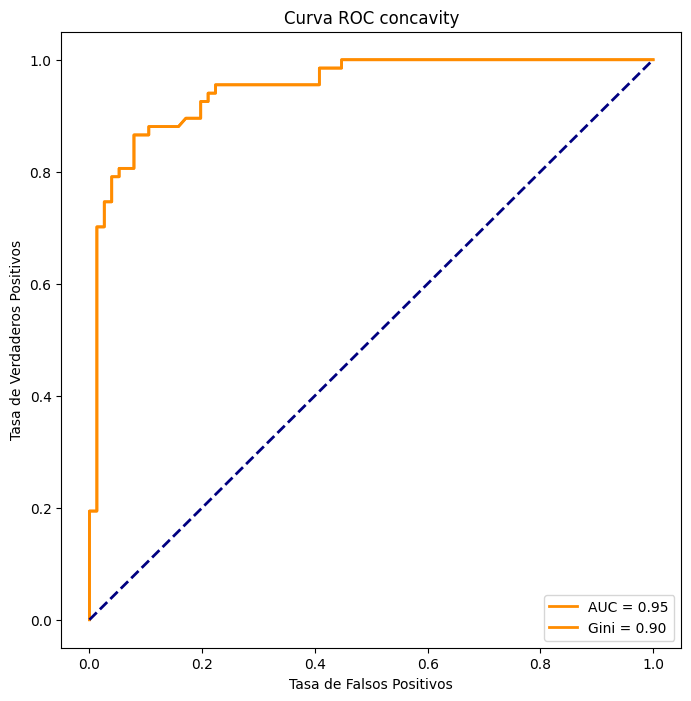

In [ ]:
#Describo mi curva rocConcavity y calculo el gini3
fpr3, tpr3, thresholds3=roc_curve(Y_test, Y3_pred_prob)
roc_auc3 = auc(fpr3, tpr3)
gini3 = 2 * roc_auc3 - 1

plt.figure(figsize=(8, 8))
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label=f'AUC = {roc_auc3:.2f}')
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label=f'Gini = {gini3:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC concavity')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Calculo AUC y Gini
roc_auc3 = auc(fpr3, tpr3)
gini3 = 2 * roc_auc3 - 1
print(roc_auc3)
print(gini3)

0.9496268656716418
0.8992537313432836


In [ ]:
#Calculo la ganancia GINI de el modelo Logístico múltiple frente a los otros
GanGin14=gini4-gini
GanGin24=gini4-gini2
GanGin34=gini4-gini3
print(GanGin14)
print(GanGin24)
print(GanGin34)

0.027690494893951367
0.37824037706205793
0.04261586802827955


Nuestro coeficiente de evaluación del modelo Gini, nos mide la capacidad de diferenciación entre las hipotesis H0 y H1, contra más alto sea mejor los diferencia, en este caso nuestro gini más alto se encuentra cuando utilizamos como variable predictoria el radio, es decir, que el radio del lunar o nevus es la variable que mejor nos ayuda ap redecir si un paciente puede llegar a desarrollar cancer o no.

### Apartado 2.3

In [ ]:
#Divido mis datos en entrenamiento y test reconociendo las variables predictoras  y la que quiero predecir
X4=df.drop(columns='Diagnosis')
Y=df['Diagnosis']
X4_train, X4_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.25, random_state=135, shuffle=True)

In [ ]:
#Describo el modelo y lo entreno
model = LogisticRegression()
model.fit(X4_train, Y_train)


LogisticRegression()

In [ ]:
#Defino mi vector de predicciones de probabiblidad
Y4_pred_prob = model.predict_proba(X4_test)[:, 1]

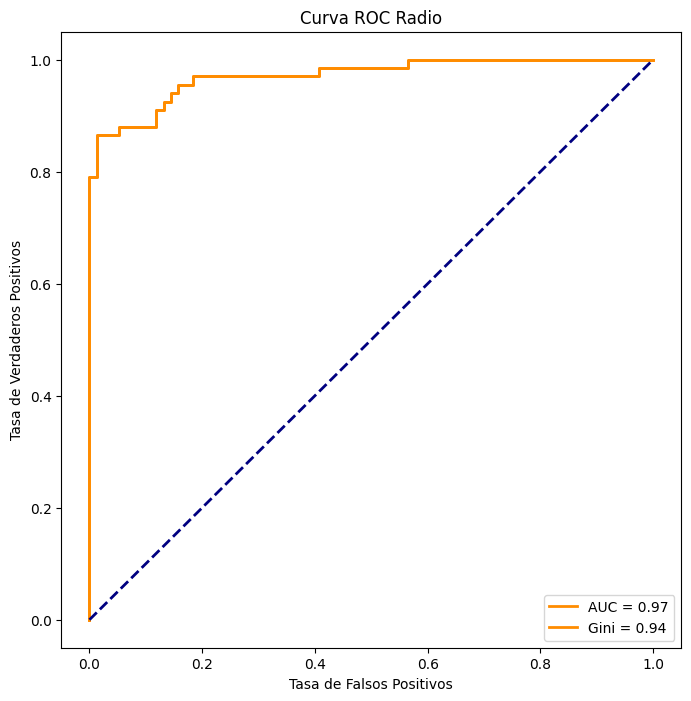

In [ ]:
#Describo mi curva roc
fpr4, tpr4, thresholds4=roc_curve(Y_test, Y4_pred_prob)
roc_auc4 = auc(fpr4, tpr4)
gini4 = 2 * roc_auc4 - 1

plt.figure(figsize=(8, 8))
plt.plot(fpr4, tpr4, color='darkorange', lw=2, label=f'AUC = {roc_auc4:.2f}')
plt.plot(fpr4, tpr4, color='darkorange', lw=2, label=f'Gini = {gini4:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Multi')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Calculo AUC y Gini
roc_auc4 = auc(fpr4, tpr4)
gini4 = 2 * roc_auc4 - 1
print(roc_auc4)
print(gini4)

0.9709347996857816
0.9418695993715631




En el caso de este modelo de regresión logística múltiple hemos conseguido un GINI de 0.941, el cual es considerablemente mejor que cualquiera de las anteriores regresiones logísticas simples. Esto tiene sentido ya que al usar más variables predictoras, tenemos más pruebas y una mejor referencia para saber si un paciente puede llegar a tener cancer o no.


### Apartado 2.4

Me basaría en la F1 Score o en la Sensibilidad, en el caso de F1 Score sería conveniente ya que combina la precisión y el recall y nos ayudaría a encontrar tanto los falsos positivos como los falsos negativos, los cuales en un problema de detección del cancer son sumamente importantes.
En el caso de considerar la sensibilidad o recall también es una métrica fiable ya que nos mide la capacidad de nuestro modelo para identificar los casos positivos osbre el total de estos, lo que es un buen indicador de calidad del modelo.

## Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

### Apartado 3.1

In [ ]:
#Creamos nuestro árbil de decisión definiendo primero nuestros conjuntos de datos
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=135)

In [ ]:
#CArgamos el modelo de árbol de decisión
cart_model = DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=135)
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=135)

In [ ]:
y_pred_cart = cart_model.predict(X_test) # Predicciones resultado
y_pred_proba_cart = cart_model.predict_proba(X_test)[:, 1] # Predicciones probabilidad

In [ ]:
#Describo sus métricas Precisión recall y F1 Score
precision_cart = precision_score(y_test, y_pred_cart)
recall_cart = recall_score(y_test, y_pred_cart)
f1_cart = f1_score(y_test, y_pred_cart)

print("Precisión:", precision_cart)
print("Recall:", recall_cart)
print("F1 Score:", f1_cart)

Precisión: 0.9411764705882353
Recall: 0.8727272727272727
F1 Score: 0.9056603773584906


El rango de todas estas métricas se comprende entre 0 y 1 siendo 0 el peor rendimiento y 1 el mejor rendimiento posible. Fijandonos en nuestros valores el modelo tienen muy buen rendimiento.

### Apartado 3.2

In [ ]:
#Creamos nuestro random Forest definiendo primero nuestros conjuntos de datos
X_forest = df.drop(columns=['Diagnosis'])
y_forest = df['Diagnosis']

X_trainf, X_testf, y_trainf, y_testf = train_test_split(X_forest, y_forest, test_size=0.2, random_state=135)

In [ ]:
#CArgo mi modelo random forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=135)
rf_model.fit(X_trainf, y_trainf)

RandomForestClassifier(max_depth=6, random_state=135)

In [ ]:
# Prediccionesde los resultados y de la probabilidad
y_pred_rf = rf_model.predict(X_testf)
y_pred_proba_rf = rf_model.predict_proba(X_testf)[:, 1]

In [ ]:
#Métricas para curva ROC
AUC= roc_auc_score(y_test, y_pred_proba_rf)
GINI = 2*roc_auc_score(y_test, y_pred_proba_rf)-1

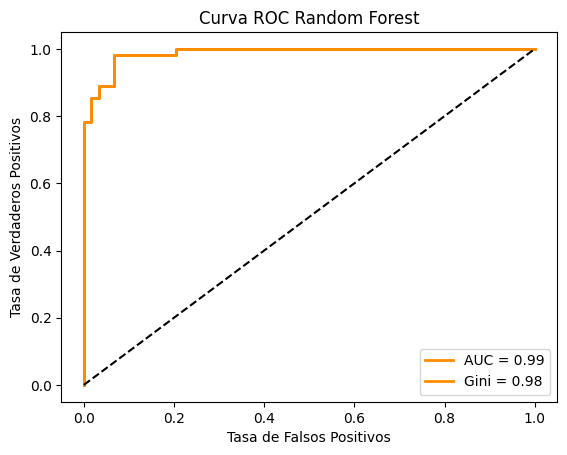

In [ ]:
#Defino la curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_testf, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'AUC = {AUC:.2f}')
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Gini = {GINI:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("Precisión:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Precisión: 0.9607843137254902
Recall: 0.8909090909090909
F1 Score: 0.9245283018867925


El mejor modelo que tenemos de entre todos los de los ultimos dos apartados es el de Random forest ya que tenemos métricas indicativas de un mejor rendimiento.

Este buen rendimento puede darse por varias causas, en primer lugar tenemos el posible overfitting al que se exponen los árboles de decisión el cual les impide generalizar para datos nuevos que no sean los de entrenamiento. Además de esto los árboles son sensibles a pequeñas variaciones en los datos y random forest ofrece una mayor robusted en ese sentido.

En este caso el random forest es un algoritmo el cual puede capturar las características y patrones no lineales de las variables predictoras con respecto a la que queremos predecir, es por eso que como nuestro conjunto de datos tiene la suficiente complejidad este modelo se adapta mejor y predice de manera exitosa.